<h1>Predicting Term Deposit Suscriptions using MLP Neural Network<h1> 
<body>
Dataset: Bank Marketing Dataset
   
<p style="font-family:Courier; color:Blue; font-size: 20px;"> This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.</p>
<p>    
The classification goal is to predict if the client will subscribe a term deposit (variable y).</p> 

<h5>Team Members: </h5><p> 
    <li> Zhaoshuai Wang</li>
    <li> Srinesh </li>
    
</p>
    
    

<h4>Importing libraries</h4>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from random import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

In [ ]:
#Uploading dataset
df = pd.read_csv("Bank_data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#Identification of the dataset
df.dtypes

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# Find null values in the dataset
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

<h3>Analyzing the categorical features</h3>

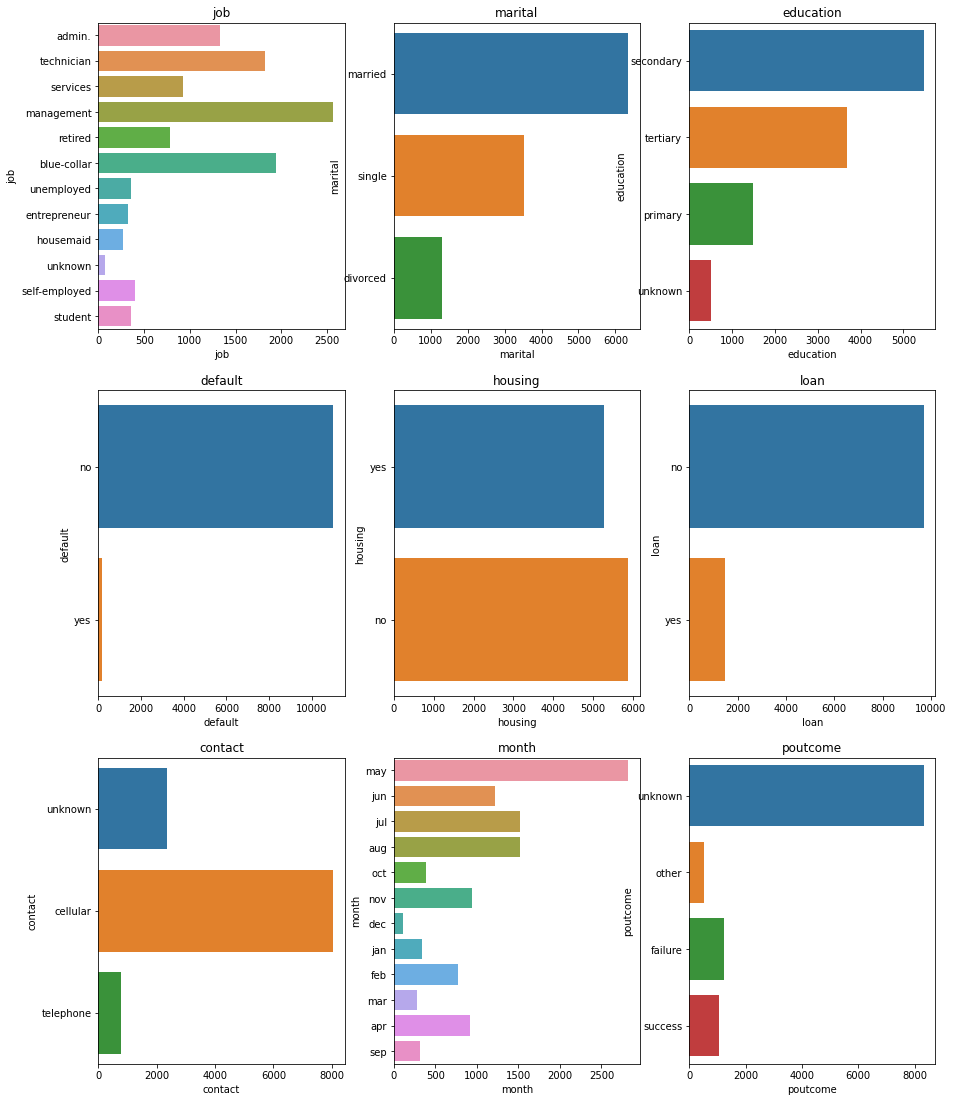

In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

<h3>Findings</h3>
<p>
1.client with job type as management records are high in given dataset and housemaid are very less<br> 
2.client who married are high in records in given dataset and divorced are less<br> 
3.client whoes education background is secondary are in high numbers in given dataset<br> 
4.defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop<br> 
5.data in month of may is high and less in dec
</p>

<h4> Subscription based on their ocupation </h4> 

<Figure size 432x288 with 0 Axes>

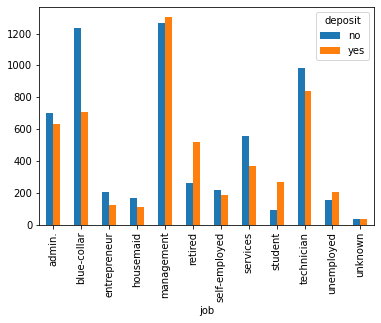

In [ ]:
fig = plt.figure()
pivot = df.pivot_table(index=['job'], columns='deposit',values='age', aggfunc='count')
pivot.plot(kind='bar')
# plt.setp(fig.get_xticklabels(), visible=True) 
plt.xticks(np.arange(len(pivot.index)), pivot.index)
plt.show()



<h3>Correlation matrix</h3>

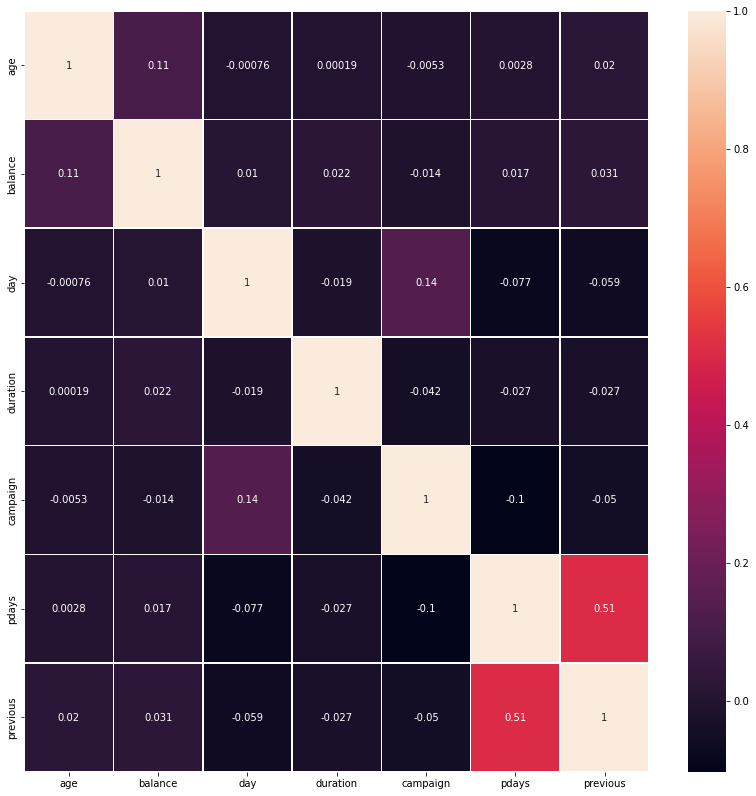

In [ ]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

<h3>Outcome</h3>

<p>
It apprears that that no feature is heavily correlated with other features</p>

<h3>Check the Data set is balanced or not based on target values in classification</h3>

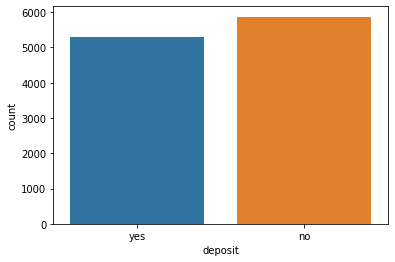

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
#Analyzing the target varible

#total patient count based on cardio_results
sns.countplot(x='deposit',data=df)
plt.show()
df['deposit'].groupby(df['deposit']).count()

<h3>Integer encoding</h3>

In [ ]:
#Identify the categorical columns in the dataset
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


In [ ]:
#Encoding the categorical values ( Integer encoding )
new_df = df.apply(LabelEncoder().fit_transform)
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [ ]:
#Randomization of the dataset
np.random.seed(1000)

In [ ]:
# Seperating the Features and Target Columns 
df_feat = new_df[new_df.columns[0:-1]] # Feature columns 
df_head = new_df[new_df.columns[len(new_df.columns)-1]]  # Target variable 

<h3>Data Normalization</h3>

In [ ]:
# Feature Scalling using Sklearn StandardScaler function
scaler = StandardScaler()
StandardScaler(copy=True,with_mean=True,with_std=True)
scaler.fit(df_feat)
scaled_features = scaler.transform(df_feat)
df_scaled = pd.DataFrame(scaled_features,columns=df_feat.columns)
df_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.491841,-1.391604,-0.318672,-0.380501,-0.123617,0.995511,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.142630,-0.567094,-0.484165,-0.382409,0.520705
1,1.239962,-1.391604,-0.318672,-0.380501,-0.123617,-0.889436,-0.947616,-0.387923,1.844786,-1.265746,0.800268,2.991533,-0.567094,-0.484165,-0.382409,0.520705
2,-0.019429,1.399105,-0.318672,-0.380501,-0.123617,0.301221,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.871649,-0.567094,-0.484165,-0.382409,0.520705
3,1.156003,0.778947,-0.318672,-0.380501,-0.123617,1.065977,1.055280,-0.387923,1.844786,-1.265746,0.800268,0.704033,-0.567094,-0.484165,-0.382409,0.520705
4,1.072044,-1.391604,-0.318672,0.953822,-0.123617,-0.745397,-0.947616,-0.387923,1.844786,-1.265746,0.800268,1.008601,-0.190022,-0.484165,-0.382409,0.520705


In [ ]:
df_scaled.dtypes

age          float64
job          float64
marital      float64
education    float64
default      float64
balance      float64
housing      float64
loan         float64
contact      float64
day          float64
month        float64
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome     float64
dtype: object

<h3>Feature Importance Analysis</h3>

Feature: 0, Score: 0.03930
Feature: 1, Score: 0.01439
Feature: 2, Score: 0.03227
Feature: 3, Score: 0.03405
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03306
Feature: 6, Score: 0.13003
Feature: 7, Score: 0.03999
Feature: 8, Score: 0.14239
Feature: 9, Score: 0.01743
Feature: 10, Score: 0.05053
Feature: 11, Score: 0.18000
Feature: 12, Score: 0.03136
Feature: 13, Score: 0.09157
Feature: 14, Score: 0.01723
Feature: 15, Score: 0.14642


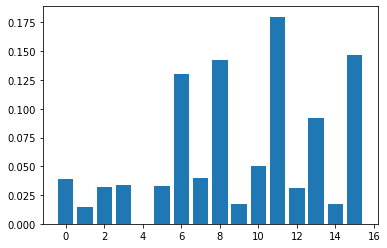

In [ ]:
##Feature Selection using XGBClassifier
model = XGBClassifier()
# fit the model
model.fit(df_scaled,df_head)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<p>All the features above the score 0.05 will be taken from the dataset.</p>

In [ ]:
## Feeding only selected features

df_filtered = df_scaled.loc[:, ["housing","loan","contact","month","duration","pdays","poutcome"]]
df_filtered.head()

,housing,loan,contact,month,duration,pdays,poutcome
0,1.055280,-0.387923,1.844786,0.800268,2.142630,-0.484165,0.520705
1,-0.947616,-0.387923,1.844786,0.800268,2.991533,-0.484165,0.520705
2,1.055280,-0.387923,1.844786,0.800268,2.871649,-0.484165,0.520705
3,1.055280,-0.387923,1.844786,0.800268,0.704033,-0.484165,0.520705
4,-0.947616,-0.387923,1.844786,0.800268,1.008601,-0.484165,0.520705


<h3>Split Dataset into Training, Validation and Test sets</h3>

<h5>Splitting the dataset into  60%,20% and 20% each  <h5>

In [ ]:
# 
# it is required to split the dataset twice 

X_train, X_test, y_train, y_test = train_test_split(df_filtered, df_head, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
X_val.count()

housing     2233
loan        2233
contact     2233
month       2233
duration    2233
pdays       2233
poutcome    2233
dtype: int64

In [ ]:
class MLP(object):
    """A Multilayer Perceptron class.
    """

    def __init__(self, num_inputs, hidden_layers, num_outputs):


        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # create random connection weights for the layers
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # save derivatives per layer
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives

        # save activations per layer
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations


    def forward_propagate(self, inputs):

        # the input layer activation is just the input itself
        activations = inputs

        # save the activations for backpropogation
        self.activations[0] = activations

        # iterate through the network layers
        for i, w in enumerate(self.weights):
            # calculate matrix multiplication between previous activation and weight matrix
            net_inputs = np.dot(activations, w)

            # apply sigmoid activation function
            activations = self._sigmoid(net_inputs)

            # save the activations for backpropogation
            self.activations[i + 1] = activations

        # return output layer activation
        return activations


    def back_propagate(self, error):

        # iterate backwards through the network layers
        for i in reversed(range(len(self.derivatives))):

            # get activation for previous layer
            activations = self.activations[i+1]

            # apply sigmoid derivative function
            delta = error * self._sigmoid_derivative(activations)

            # reshape delta as to have it as a 2d array
            delta_re = delta.reshape(delta.shape[0], -1).T

            # get activations for current layer
            current_activations = self.activations[i]

            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0],-1)

            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, delta_re)

            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate,validation_data,validation_freq = 10):

        self.validation_freq = validation_freq
        self.train_acc_history = []
        self.valid_acc_history = []
        # now enter the training loop
        for i in range(epochs):
            true_predictions = 0

            # iterate through all the training data
            for j, input in enumerate(inputs):
                target = targets[j]

                # activate the network!
                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)

                # now perform gradient descent on the derivatives
                # (this will update the weights
                self.gradient_descent(learning_rate)

                # keep track of the MSE for reporting later
                true_predictions += int((target==1 and output>0.5) or (target==0 and output<0.5))
            
            # Epoch complete, report the training error
            print("Accuracy: {} at epoch {}".format(true_predictions / len(inputs), i+1))
            self.train_acc_history.append(true_predictions / len(inputs))
            
            if self.check_overfitting(validation_data,i):
                print("Edge of overfitting reached! Training terminated")
                break
                
        print("Training complete!")
        print("=====")

#Learns by descending the gradient
    def gradient_descent(self, learningRate=1):
        
        # update the weights by stepping down the gradient
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate
            
    def _sigmoid(self, x):

        y = 1.0 / (1 + np.exp(-x))
        return y


    def _sigmoid_derivative(self, x):

        return x * (1.0 - x)


    
    def check_overfitting(self,validation_data,ii):
        inputs,targets = validation_data[0],validation_data[1]
        true_preds = 0
        for i, input in enumerate(inputs):
            target = targets[i]
            # activate the network!
            output = self.forward_propagate(input)
            # keep track of the MSE for reporting later
            true_preds += int((target==1 and output>0.5) or (target==0 and output<0.5))
        self.valid_acc_history.append(true_preds/len(inputs))
        if ii%self.validation_freq == 0:
            if len(self.valid_acc_history)!=1:
                if self.valid_acc_history[-1]<self.valid_acc_history[-1-self.validation_freq]:
                    return True
        return False
    
    def plot_acc(self):
        epoches = len(self.train_acc_history)
        plt.plot(list(range(epoches)),self.train_acc_history,label = 'Training')
        
        plt.plot(list(range(epoches)),self.valid_acc_history, label = 'Validation')
        
        plt.xlabel("epoches")
        plt.ylabel("Accuracy")
        plt.title("Accuracy History")
        plt.legend(loc = 'best')
        plt.show()
        

In [ ]:
if __name__ == "__main__":
    
    # Convert both features and target variables in array to train a network for the sum operation
    innns = np.array(X_train) # assigning the features set 
    targets = np.array(y_train)  # assigning the target variable 
    
    valid_data = (np.array(X_val),np.array(y_val))
    no_hidden_layers = []
    for i in range(0,3):
        no_hidden_layers.append(10)
    # create a Multilayer Perceptron with no of hidden layers
    mlp = MLP(df_filtered.shape[1], no_hidden_layers, 1)

    # train network
    mlp.train(innns, targets, 100, 0.8,valid_data,5)
    


    print()
    

Accuracy: 0.5321087216248507 at epoch 1
Accuracy: 0.7759856630824373 at epoch 2
Accuracy: 0.7898745519713262 at epoch 3
Accuracy: 0.7970430107526881 at epoch 4
Accuracy: 0.8027180406212664 at epoch 5
Accuracy: 0.8025686977299881 at epoch 6
Accuracy: 0.8057048984468339 at epoch 7
Accuracy: 0.80973715651135 at epoch 8
Accuracy: 0.8086917562724014 at epoch 9
Accuracy: 0.8092891278375149 at epoch 10
Accuracy: 0.8095878136200717 at epoch 11
Accuracy: 0.8085424133811231 at epoch 12
Accuracy: 0.8091397849462365 at epoch 13
Accuracy: 0.8095878136200717 at epoch 14
Accuracy: 0.8089904420549582 at epoch 15
Accuracy: 0.8094384707287933 at epoch 16
Edge of overfitting reached! Training terminated
Training complete!
=====



 <h5> Now Testing on test data</h5>

In [ ]:
# testing new data

input = X_test
target = y_test  

# get a prediction
output = mlp.forward_propagate(input)

In [ ]:
final_binary_output = []
for value in output:
    if value >= 0.5:
        final_binary_output.append(1)
    else:
        final_binary_output.append(0)
    

In [ ]:
print(final_binary_output)

[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 

 <h5> Final Accuracy</h5>

In [ ]:
test_acc = accuracy_score(target, final_binary_output)

In [ ]:
print(test_acc) #test accuracy

0.8011643528884909


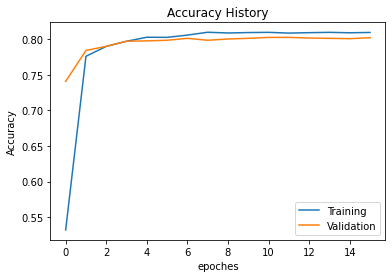

In [ ]:
mlp.plot_acc()

In [ ]:
# Training and Validation Accuracy
final_validation_acc = mlp.valid_acc_history[-1]
final_training_acc = mlp.train_acc_history[-1]
print(f"final_validation_acc: {final_validation_acc}\nfinal_training_acc: {final_training_acc}")

final_validation_acc: 0.8020600089565607
final_training_acc: 0.8094384707287933


In [ ]:

conf_mat = confusion_matrix(target, final_binary_output)
print(conf_mat)

[[885 280]
 [164 904]]


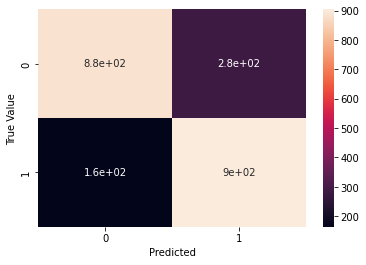

In [ ]:
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

<h3> Keras implementation of MLP Neural Network</h3>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_filtered, df_head, test_size=0.3, random_state=10)

In [ ]:
# In the model first layer with 32 neurons and input dimension = 7

# dense output layer with the activation function sigmoid
model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# binary cross-entropy as a loss function, and Adam as optimizer it calculates an exponential moving average of the gradient and the square gradient

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=0)

In [ ]:
#Evaluate the model

loss,accuracy = model.evaluate(X_test,y_test,verbose=0)
print("Model Loss: %2f,Accuracy: %2f" % ((loss*100),(accuracy*100)))

Model Loss: 37.459338,Accuracy: 83.816063


<h2> Benchmark Model</h2>

<h5>Using Xgboost Classifier</h5>

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier(objective='binary:logistic',min_child_weight=1,n_jobs=1,learning_rate=0.1,max_depth=6,n_estimators=100)

In [ ]:
model_xgb.fit(X_train,y_train)

XGBClassifier(max_depth=6)

In [ ]:
model_xgb.score(X_test,y_test)

0.8596595998805614

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
print(cm)

[[1451  281]
 [ 189 1428]]


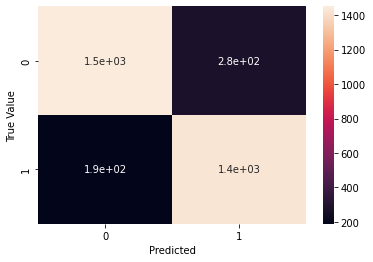

In [ ]:
#plot the graph

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

<h5>Using Random Forest Algorithm</h5>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
classification =RandomForestClassifier(n_estimators=100)

In [ ]:
#Model Training 

classification.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=classification.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8118841445207524


In [ ]:
### Now Let's use new python library called EvalML to find which algorithm and it's parameters are better for this scenario

In [ ]:
pip install evalml

     |████████████████████████████████| 6.4 MB 4.3 MB/s 
     |████████████████████████████████| 1.6 MB 55.0 MB/s 
     |████████████████████████████████| 336 kB 59.0 MB/s 
     |████████████████████████████████| 2.6 MB 45.7 MB/s 
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 15.7 MB 54.5 MB/s 
     |████████████████████████████████| 6.2 MB 12.0 MB/s 
     |████████████████████████████████| 11.2 MB 45.4 MB/s 
     |████████████████████████████████| 11.3 MB 46.9 MB/s 
     |████████████████████████████████| 100 kB 9.4 MB/s 
     |████████████████████████████████| 275 kB 33.3 MB/s 
     |████████████████████████████████| 564 kB 45.9 MB/s 
     |████████████████████████████████| 9.8 MB 39.6 MB/s 
     |████████████████████████████████| 18.0 MB 33 kB/s 
     |████████████████████████████████| 3.4 MB 45.2 MB/s 
     |████████████████████████████████| 1.0 MB 48.0 MB/s 
     |████████████████████████████████| 82 kB 413 kB/s 
     |██████████

In [ ]:
import evalml

In [ ]:
from evalml import AutoMLSearch

In [ ]:
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='binary',max_batches=1,optimize_thresholds=True)
automl.search()

In [ ]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Classifier w/ Label Encoder + Imputer,3,0.383888,0.025768,0.374438,97.635102,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,4,LightGBM Classifier w/ Label Encoder + Imputer,4,0.398677,0.021562,0.393928,97.543996,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.427231,0.009531,0.420753,97.368092,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.486163,0.015870,0.478209,97.005049,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,2,Logistic Regression Classifier w/ Label Encode...,2,0.486165,0.015865,0.478216,97.005033,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,8,Extra Trees Classifier w/ Label Encoder + Imputer,8,0.493151,0.005266,0.496051,96.961997,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,5,CatBoost Classifier w/ Label Encoder + Imputer,5,0.609301,0.002483,0.607152,96.246471,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.635055,0.032586,0.629374,96.087811,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,16.232739,0.003598,16.228584,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [ ]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Imputer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'XGBoost Classifier':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}, random_seed=0)

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************************
* XGBoost Classifier w/ Label Encoder + Imputer *
*************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 1.8 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.374       0.669 0.821 0.911      0.778 0.832                     0.834            0.830      5,208        2,605
1                      0.413       0.645 0.783 

In [ ]:
scores = best_pipeline.score(X_test, y_test,  objectives=evalml.objectives.get_core_objectives('binary'))
print(f'Accuracy : {scores["Accuracy Binary"]}')

Accuracy : 0.8527918781725888
